In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load mat files
import scipy.io
mat= scipy.io.loadmat('/content/drive/MyDrive/Colab Notebooks/Neural Network project/ECGData.mat')

In [ ]:
#to know what workspace variables (keys) the mat file contains
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ECGData'])

In [ ]:
ecg=mat['ECGData']

In [ ]:
#split the ECGData into data and labels
data=ecg[0][0][0]
labels=ecg[0][0][1]

In [ ]:
#to know the dimension of data matrix 
data.shape

(162, 65536)

Text(0.5, 1.0, 'ARR ECG')

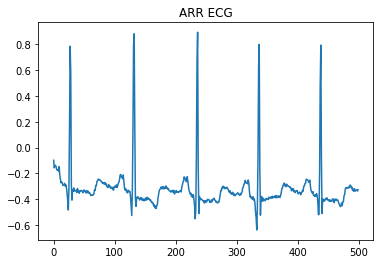

In [ ]:
#to plot the signal 
import matplotlib.pyplot as plt 
plt.plot(data[0,:500])
plt.title("ARR ECG")

Text(0.5, 1.0, 'CHF ECG')

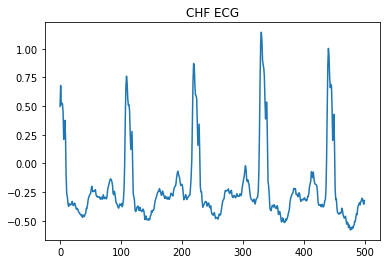

In [ ]:
plt.plot(data[96,:500])
plt.title("CHF ECG")

Text(0.5, 1.0, 'NSR ECG')

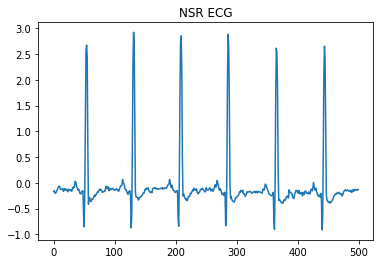

In [ ]:
plt.plot(data[126,:500])
plt.title("NSR ECG")

In [ ]:
# I will take 30 recordings of each signal
ARR = data[0:30,:]     #Taken first 30 recordings from each class
CHF = data[96:126,:]
NSR = data[127:157,:]

In [ ]:
labels_ARR=labels[0:30,]
labels_CHF = labels[96:126,]
labels_NSR = labels[127:157,]

In [ ]:
import numpy as np
total_labels=np.concatenate((labels_ARR, labels_CHF,labels_NSR), axis=0)

In [ ]:
type(total_labels)

numpy.ndarray

In [ ]:
total_labels.shape

(90, 1)

In [ ]:
NSR.shape

(30, 65536)

In [ ]:
ARR.shape

(30, 65536)

In [ ]:
import pywt
import numpy as np
from scipy.signal import spectrogram

In [ ]:
signal_length=1000
observation=0
t=np.arange(0,len(data[observation,:signal_length]))
t

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
fs=128
signal_length=1000
observation=0
t=np.arange(0,len(data[observation,:signal_length]))
cwtmatr,freqs=pywt.cwt(data[observation,:signal_length],np.arange(1,200),wavelet='morl',sampling_period=1/fs)

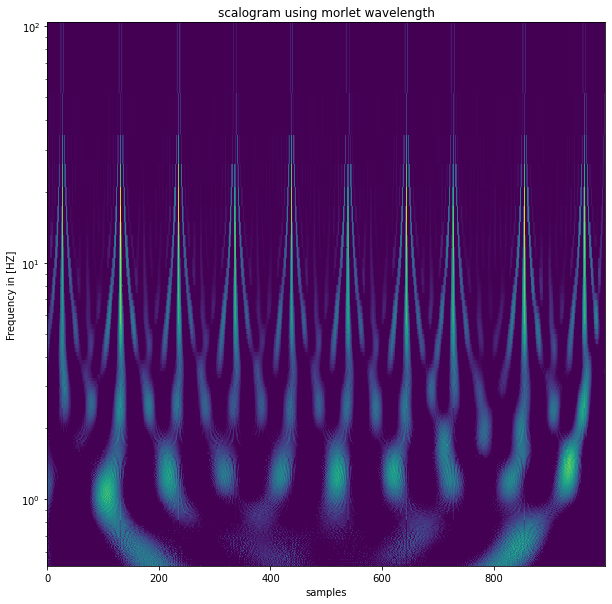

In [ ]:
#scalogram for one observation 
fs=128
signal_length=1000
observation=0
t=np.arange(0,len(data[observation,:signal_length]))
fig,ax4=plt.subplots(1,1,sharex=True,figsize=(10,10))
#wavelet transform, i.e.scalogram
cwtmatr,freqs=pywt.cwt(data[observation,:signal_length],np.arange(1,200),wavelet='morl',sampling_period=1/fs)
im2=ax4.pcolormesh(t,freqs,cwtmatr,vmin=0,cmap='viridis')
plt.yscale('log')
#ax4.set_ylim(0,10)
ax4.set_ylabel("Frequency in [HZ]")
ax4.set_xlabel("samples")
ax4.set_title("scalogram using morlet wavelength")
plt.savefig("/content/fig1.jpg",format='jpg')
plt.show()
plt.close()

In [ ]:
from PIL import Image
image = Image.open('/content/fig1.jpg')

In [ ]:
image.show()

In [ ]:
print(image.mode)

RGB


In [ ]:
#to delete the folder i created 
import shutil
shutil.rmtree('/content/ecgdataset')

In [ ]:
import os
os.mkdir('ecgdataset');   #main folder
os.mkdir('ecgdataset/arr'); #sub folder
os.mkdir('ecgdataset/chf'); #sub folder
os.mkdir('ecgdataset/nsr'); #sub folder

In [ ]:
fs=128
signal_length=1000
for i in range(0,30):
  t=np.arange(0,len(ARR[i,:signal_length]))
  fig,ax4=plt.subplots(1,1,sharex=True,figsize=(10,10))
#wavelet transform, i.e.scalogram
  cwtmatr,freqs=pywt.cwt(ARR[i,:signal_length],np.arange(1,200),wavelet='morl',sampling_period=1/fs)
  im2=ax4.pcolormesh(t,freqs,cwtmatr,vmin=0,cmap='viridis')
  plt.yscale('log')
  plt.savefig("/content/ecgdataset/arr/fig" + str(i) +".jpg", format="jpg")
  plt.show()
  plt.close()

In [ ]:
fs=128
signal_length=1000
for i in range(0,30):
#observation=0
  t=np.arange(0,len(CHF[i,:signal_length]))
  fig,ax4=plt.subplots(1,1,sharex=True,figsize=(10,10))
#wavelet transform, i.e.scalogram
  cwtmatr,freqs=pywt.cwt(CHF[i,:signal_length],np.arange(1,200),wavelet='morl',sampling_period=1/fs)
  im2=ax4.pcolormesh(t,freqs,cwtmatr,vmin=0,cmap='viridis')
  plt.yscale('log')
  plt.savefig("/content/ecgdataset/chf/fig" + str(i) +".png", format="PNG")
  plt.show()
  plt.close()
  #plt.savefig("/content/drive/MyDrive/ecgdataset/arr/fig.jpg",images)
  #plt.savefig('/content/drive/MyDrive/ecgdataset/arr/fig.jpg', dpi=100, format='jpg', bbox_inches="tight")
  #plt.savefig("/content/drive/MyDrive/ecgdataset/chf/fig" + str(i) +".png", format="PNG")

In [ ]:
fs=128
signal_length=1000
for i in range(0,30):
  t=np.arange(0,len(NSR[i,:signal_length]))
  fig,ax4=plt.subplots(1,1,sharex=True,figsize=(10,10))
#wavelet transform, i.e.scalogram
  cwtmatr,freqs=pywt.cwt(NSR[i,:signal_length],np.arange(1,200),wavelet='morl',sampling_period=1/fs)
  im2=ax4.pcolormesh(t,freqs,cwtmatr,vmin=0,cmap='viridis')
  plt.yscale('log')
  plt.savefig("/content/ecgdataset/nsr/fig" + str(i) +".png", format="PNG")
  plt.show()
  plt.close()

In [ ]:
!zip -r /content/ecgdataset.zip /content/ecgdataset

  adding: content/ecgdataset/ (stored 0%)
  adding: content/ecgdataset/arr/ (stored 0%)
  adding: content/ecgdataset/arr/fig3.jpg (deflated 11%)
  adding: content/ecgdataset/arr/fig11.jpg (deflated 8%)
  adding: content/ecgdataset/arr/fig22.jpg (deflated 9%)
  adding: content/ecgdataset/arr/fig24.jpg (deflated 8%)
  adding: content/ecgdataset/arr/fig5.jpg (deflated 11%)
  adding: content/ecgdataset/arr/fig10.jpg (deflated 12%)
  adding: content/ecgdataset/arr/fig9.jpg (deflated 10%)
  adding: content/ecgdataset/arr/fig20.jpg (deflated 8%)
  adding: content/ecgdataset/arr/fig1.jpg (deflated 9%)
  adding: content/ecgdataset/arr/fig19.jpg (deflated 8%)
  adding: content/ecgdataset/arr/fig29.jpg (deflated 8%)
  adding: content/ecgdataset/arr/fig0.jpg (deflated 8%)
  adding: content/ecgdataset/arr/fig27.jpg (deflated 8%)
  adding: content/ecgdataset/arr/fig2.jpg (deflated 10%)
  adding: content/ecgdataset/arr/fig6.jpg (deflated 10%)
  adding: content/ecgdataset/arr/fig7.jpg (deflated 8%)
  

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [299, 299]


In [ ]:
#Give dataset path
train_path = '/content/drive/MyDrive/Colab Notebooks/Neural Network project/ECGdataset/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/Neural Network project/ECGdataset/test'

Working with 24 images
Image examples: 
fig1.jpg


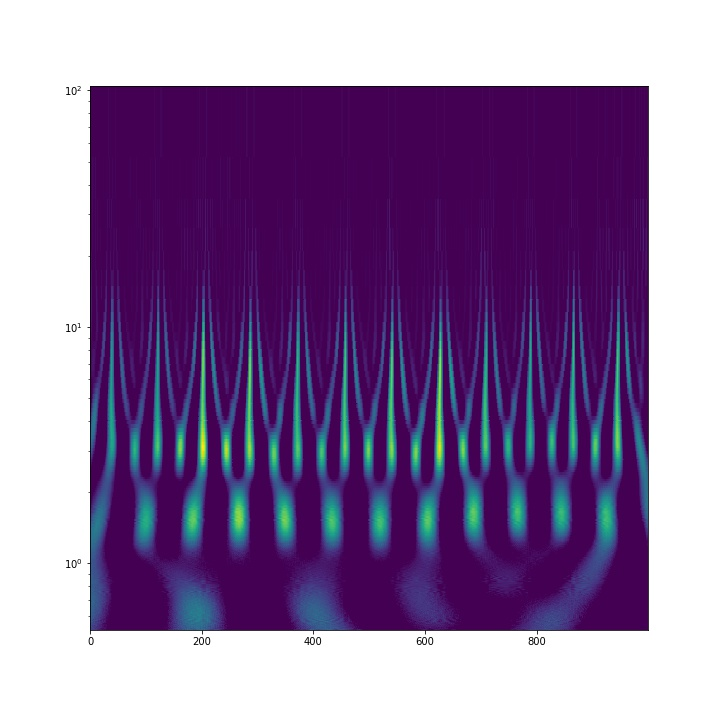

fig0.jpg


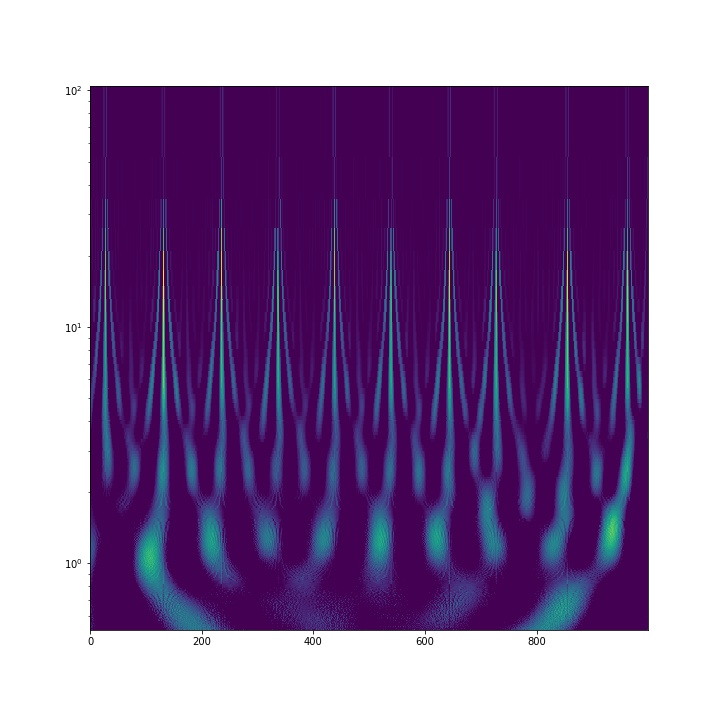

fig20.jpg


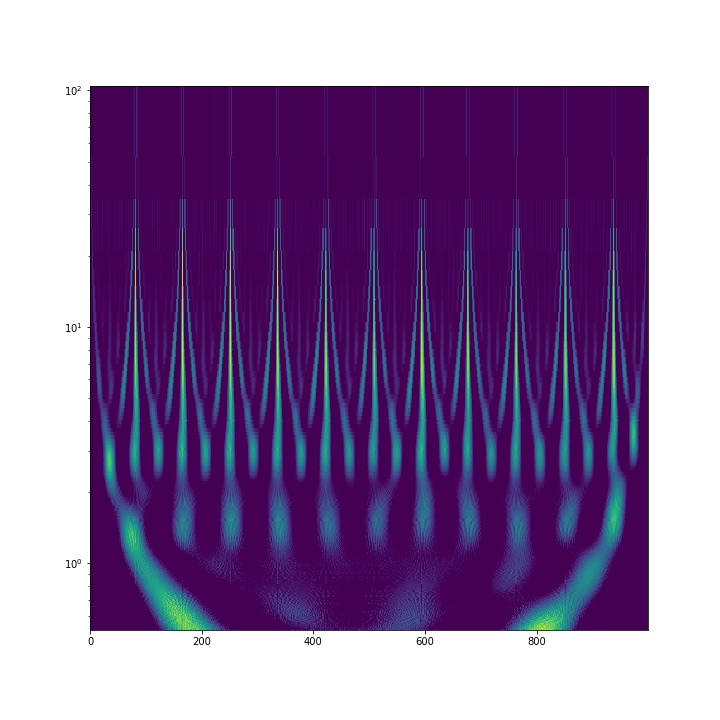

In [ ]:
from scipy.io.matlab.miobase import arr_to_chars
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/arr'


ARR = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(ARR)))
print("Image examples: ")


for i in range(3):
    print(ARR[i])
    display(_Imgdis(filename=folder + "/" + ARR[i], width=240, height=240))

In [ ]:
#include_top: whether to include the fully-coIV3ected layer at the top of the network.
#weights: one of None (random initialization), 'imagenet' (pre-training on ImageNet), or the path to the weights file to be loaded.
IV3= InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
IV3.input


<KerasTensor: shape=(None, 299, 299, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
for layer in IV3.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/Neural Network project/ECGdataset/train/*')
print(len(folders))

3


In [ ]:
x = Flatten()(IV3.output)
#  add a fully-coIV3ected layer and a logistic layer --we have 2 classes(folders: Grasp or Replace)
prediction = Dense(len(folders), activation='softmax')(x)
# this is the model we will train
model = Model(inputs=IV3.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
from tensorflow.keras import optimizers


adam = optimizers.Adam()
#compile the model (should be done *after* setting layers to non-trainable)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
   )

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    )

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 72 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 3 classes.


In [ ]:
#saving weights in case we need it 
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='/content/sample_data/IV3weights.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=30,
 
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/30

Epoch 1: val_loss improved from inf to 7.48815, saving model to /content/sample_data/IV3weights.h5
3/3 - 38s - loss: 6.6440 - accuracy: 0.2917 - val_loss: 7.4882 - val_accuracy: 0.3333 - 38s/epoch - 13s/step
Epoch 2/30

Epoch 2: val_loss improved from 7.48815 to 4.41960, saving model to /content/sample_data/IV3weights.h5
3/3 - 20s - loss: 7.2266 - accuracy: 0.3194 - val_loss: 4.4196 - val_accuracy: 0.3333 - 20s/epoch - 7s/step
Epoch 3/30

Epoch 3: val_loss improved from 4.41960 to 3.13961, saving model to /content/sample_data/IV3weights.h5
3/3 - 22s - loss: 3.3880 - accuracy: 0.4583 - val_loss: 3.1396 - val_accuracy: 0.3889 - 22s/epoch - 7s/step
Epoch 4/30

Epoch 4: val_loss did not improve from 3.13961
3/3 - 20s - loss: 2.9717 - accuracy: 0.5694 - val_loss: 3.2480 - val_accuracy: 0.6667 - 20s/epoch - 7s/step
Epoch 5/30

Epoch 5: val_loss did not improve from 3.13961
3/3 - 21s - loss: 1.6743 - accuracy: 0.7083 - val_loss: 5.5851 - val_accuracy: 0.5556 - 21s/epoch - 7s/step


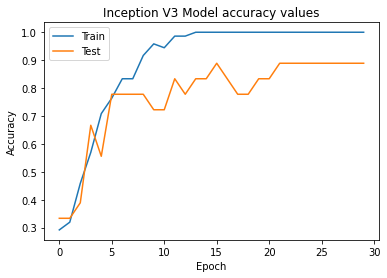

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Inception V3 Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()